# Linear Regression (implementing Gradient Descent)

$$y = mx + b$$

m is slope, b is y-intercept

The optimal values of m and b can be actually calculated with way less effort than doing a linear regression. this is just to demonstrate gradient descent

![0_szXvH1a4ZQytyqhg.png](./images/0_szXvH1a4ZQytyqhg.png)

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Importing Data

In [2]:
data = np.genfromtxt("./data.csv", delimiter=",")
print("shape of data is {}".format(data.shape))
print("first 5 datasets \n{}".format(data[:5]))

shape of data is (100, 2)
first 5 datasets 
[[32.50234527 31.70700585]
 [53.42680403 68.77759598]
 [61.53035803 62.5623823 ]
 [47.47563963 71.54663223]
 [59.81320787 87.23092513]]


In [3]:
def linear_equation(m,b,x):
    return m * x + b

In [4]:
def plot(points, m, b):
    x = points[:,0]
    y = points[:,1]
    plt.scatter(x, y)
    plt.plot(x, linear_equation(m, b, x), label="fit line for m={} and b={}".format(m,b))
    plt.legend()
    plt.show()

### Hyperparameters

In [6]:
learning_rate = 0.0001

![learning-rates.png](./images/learning-rates.png)

![lr.png](./images/lr.png)

In [17]:
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 10

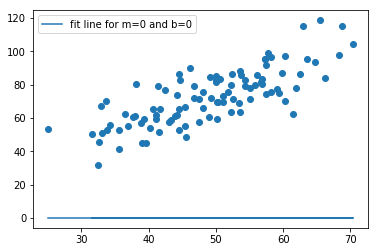

In [8]:
plot(data, initial_m, initial_b)

![1_8LyCKzZM0CX_pl-gaBHx0g.jpeg](./images/1_8LyCKzZM0CX_pl-gaBHx0g.jpeg)

$$MSE_{(m,b)}=\frac{1}{N}\sum_{i=1}^{N}{(y_i - y)^2}$$

$$MSE_{(m,b)}=\frac{1}{N}\sum_{i=1}^{N}{(y_i - (mx_i + b))^2}$$

In [9]:
def compute_error(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [10]:
error = compute_error(initial_b, initial_m, data)
print("Error at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, error))

Error at b = 0, m = 0, error = 5565.107834483211


$$
\frac{\partial}{\partial m} = 
\frac{2}{N}
\sum_{i=1}^{N}{- x_i(y_i-y)} =
\frac{2}{N}
\sum_{i=1}^{N}{- x_i(y_i-(mx_i+b))}
$$

$$
\frac{\partial}{\partial b} = 
\frac{2}{N}
\sum_{i=1}^{N}{- (y_i - y)} =
\frac{2}{N}
\sum_{i=1}^{N}{- (y_i - (mx_i + b))}
$$

In [11]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [21]:
def calculate_m_b_with_gradient_descent(data, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    
    plt.axis([0, 10, 0, 1])
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(data), learning_rate)
        error = compute_error(b,m,data)
    
        plot_x = data[:,0]
        plot_y = data[:,1]
        plt.scatter(plot_x, plot_y)
        plt.plot(plot_x, linear_equation(m, b, plot_x), c="orange", label="m={}, b={}, \nerr={} and iter={}".format(m,b,error,i))
        plt.legend()
        plt.pause(0.0005)
        
    plt.show()
    return [b, m]

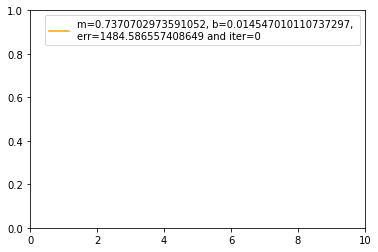

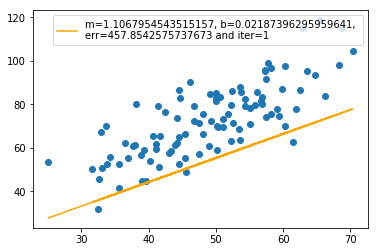

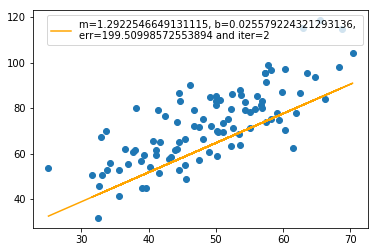

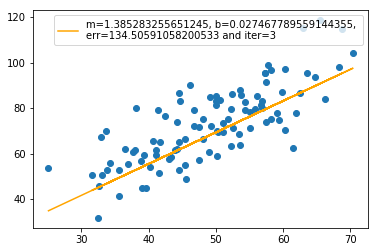

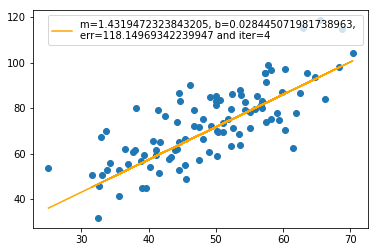

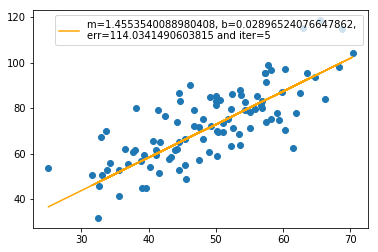

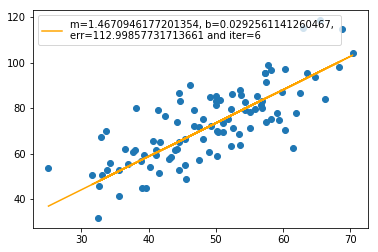

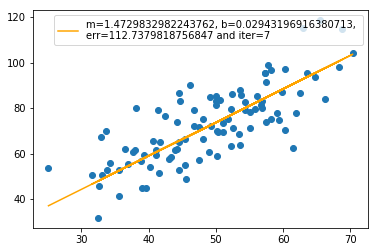

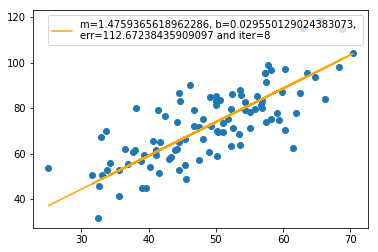

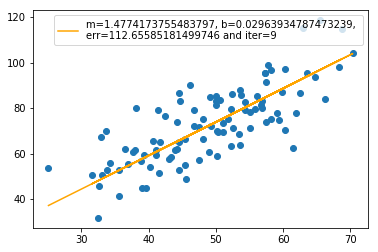

(0.02963934787473239, 1.4774173755483797)

In [22]:
[b, m] = calculate_m_b_with_gradient_descent(data, initial_b, initial_m, learning_rate, num_iterations)
b,m

In [23]:
error = compute_error(b, m, data)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, error))

After 10 iterations b = 0.02963934787473239, m = 1.4774173755483797, error = 112.65585181499746


In [24]:
def LinearRregressionModel(x):
    return m * x + b

In [25]:
print("prediction for x = 20, y = mx + b = ", LinearRregressionModel(20))

prediction for x = 20, y = mx + b =  29.577986858842326


## References


- [Linear Regression for Machine Learning](https://machinelearningmastery.com/linear-regression-for-machine-learning/)
- [An Introduction to Gradient Descent and Linear Regression](https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/)
- [Gradient descent - WIKI](https://en.wikipedia.org/wiki/Gradient_descent)
- [Gradient Descent For Machine Learning](https://machinelearningmastery.com/gradient-descent-for-machine-learning/)
- [Introduction to Gradient Descent Algorithm (along with variants) in Machine Learning](https://www.analyticsvidhya.com/blog/2017/03/introduction-to-gradient-descent-algorithm-along-its-variants/)
- [Optimization: Stochastic Gradient Descent](http://ufldl.stanford.edu/tutorial/supervised/OptimizationStochasticGradientDescent/)
- [Understanding Learning Rates and How It Improves Performance in Deep Learning
](https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10)
- [Introduction to Machine Learning Algorithms: Linear Regression](https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a)

## Task: Homework

- Write your own LinearRegression model for "Experience-salary" dataset
- Predict monthly salary for new developer based upon his experience

Datasets: 
- two columns (features)
- column1: experience (in number of years)
- column2: salary (in dollor per month)